In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading dataset

In [190]:
df=pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Cleaning data




creating dummy dataframes for some columns


In [191]:
dummies=pd.get_dummies(df['fuel'])
df=df.merge(dummies,left_index=True ,right_index=True)
df=df.drop('fuel',axis=1)

In [192]:
dummies=pd.get_dummies(df['owner'])
df=df.merge(dummies,left_index=True ,right_index=True)
df=df.drop('owner',axis=1)


In [193]:
dummies=pd.get_dummies(df['seller_type'])
df=df.merge(dummies,left_index=True ,right_index=True)
df=df.drop('seller_type',axis=1)


In [194]:
dummies=pd.get_dummies(df['transmission'])
df=df.merge(dummies,left_index=True ,right_index=True)
df=df.drop('transmission',axis=1)

Dropping columns


In [195]:
df=df.drop('torque',axis=1)
df=df.drop('name',axis=1)


In [196]:
pd.set_option('display.max_columns', None)
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,5.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,5.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,5.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,1


Seperating numbers from string on certain columns
Eg: 23.4 kmpl= 23.4


In [197]:
df= df.assign(mileage = lambda x: x['mileage'].str.extract('(\d+\.\d+)'))

df= df.assign(engine = lambda x: x['engine'].str.extract('(\d+)'))

df= df.assign(max_power = lambda x: x['max_power'].str.extract('(\d+[.]\d+|\d+)'))


In [198]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,2014,450000,145500,23.4,1248,74,5.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,2014,370000,120000,21.14,1498,103.52,5.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,17.7,1497,78,5.0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,23.0,1396,90,5.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,2007,130000,120000,16.1,1298,88.2,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,1


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8128 non-null   int64  
 1   selling_price         8128 non-null   int64  
 2   km_driven             8128 non-null   int64  
 3   mileage               7907 non-null   object 
 4   engine                7907 non-null   object 
 5   max_power             7912 non-null   object 
 6   seats                 7907 non-null   float64
 7   CNG                   8128 non-null   uint8  
 8   Diesel                8128 non-null   uint8  
 9   LPG                   8128 non-null   uint8  
 10  Petrol                8128 non-null   uint8  
 11  First Owner           8128 non-null   uint8  
 12  Fourth & Above Owner  8128 non-null   uint8  
 13  Second Owner          8128 non-null   uint8  
 14  Test Drive Car        8128 non-null   uint8  
 15  Third Owner          

Removing Null values from columns

In [200]:
df=df.dropna(subset=['mileage'])
df=df.dropna(subset=['engine'])
df=df.dropna(subset=['max_power'])
df=df.dropna(subset=['seats'])

Changing data types of certain columns

In [201]:
df['mileage']=df['mileage'].astype('float32')
df['engine']=df['engine'].astype('float32')
df['max_power']=df['max_power'].astype('float32')
df['seats']=df['seats'].astype('float32')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  7906 non-null   int64  
 1   selling_price         7906 non-null   int64  
 2   km_driven             7906 non-null   int64  
 3   mileage               7906 non-null   float32
 4   engine                7906 non-null   float32
 5   max_power             7906 non-null   float32
 6   seats                 7906 non-null   float32
 7   CNG                   7906 non-null   uint8  
 8   Diesel                7906 non-null   uint8  
 9   LPG                   7906 non-null   uint8  
 10  Petrol                7906 non-null   uint8  
 11  First Owner           7906 non-null   uint8  
 12  Fourth & Above Owner  7906 non-null   uint8  
 13  Second Owner          7906 non-null   uint8  
 14  Test Drive Car        7906 non-null   uint8  
 15  Third Owner          

Checking Co-relation

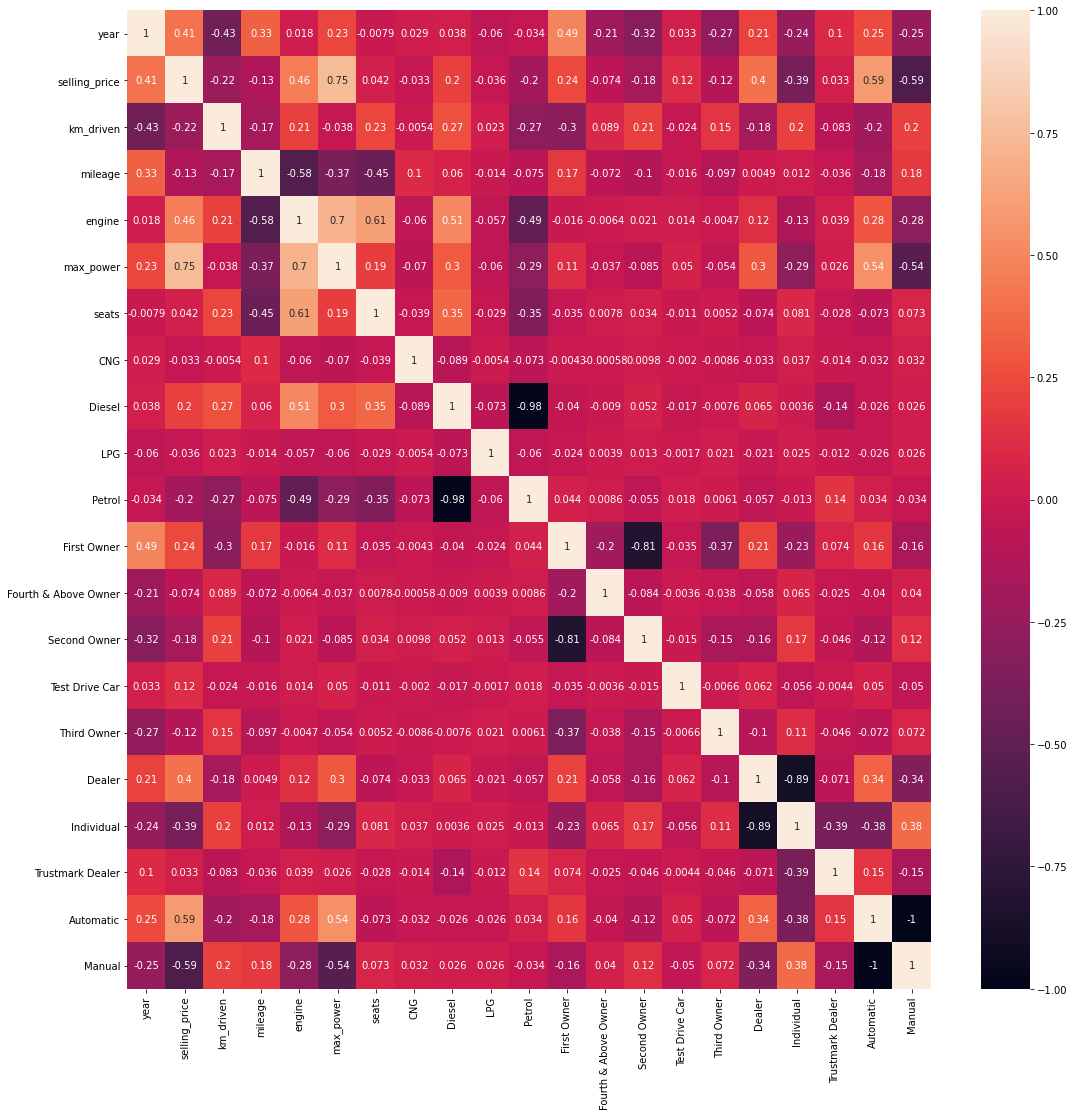

In [203]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

Now we use linear regression

In [204]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [205]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

In [206]:
regr = LinearRegression() 
  
regr.fit(x_train, y_train) 

LinearRegression()

In [207]:
regr.score(x_test, y_test)

0.6632116111245054

In [208]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5534, 20), (2372, 20), (5534,), (2372,))

In [209]:
y_pred=regr.predict(x_test)

In [210]:
y_test

3163    589000
947     240000
5027    532000
1947    300000
5546    630000
         ...  
691     114999
4967    790000
2006    650000
1403    350000
7539    150000
Name: selling_price, Length: 2372, dtype: int64

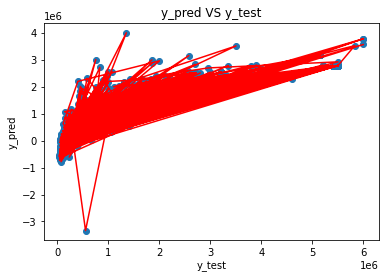

In [211]:


plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred,color='red')
plt.title('y_pred VS y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The prediction results weren't very accurate .

Dropping some columns to test it further.

In [212]:
df=df.drop(['Trustmark Dealer','Fourth & Above Owner','LPG','CNG','seats'],axis=1)

In [213]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

regr = LinearRegression() 
regr.fit(x_train, y_train) 

regr.score(x_test, y_test)

0.6635635060904639

In [214]:
regr.predict(x_test)

array([3145956.19783536, 1103317.91441764,  464680.15833045, ...,
        591075.20368393,   83029.70565139,  661338.51610728])

In [215]:
y_test

371     5150000
6182     779000
6122     316000
7898     795000
4049     430000
         ...   
2030     511000
8097     880000
1736     800000
3075     215000
5549     250000
Name: selling_price, Length: 2372, dtype: int64

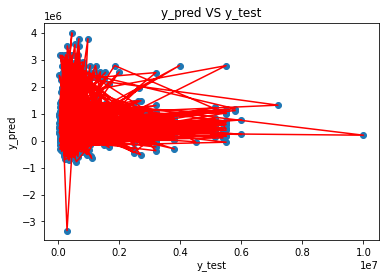

In [216]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred,color='red')
plt.title('y_pred VS y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The prediction is still not very good.


Using Random Forest Regression

In [217]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
x=df.drop('selling_price',axis=1)
y=df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [218]:
regressor.score(x_test,y_test)

0.9966260792871817

In [219]:
regressor.predict(x_test)

array([293958.        , 550000.        , 558166.66666667, ...,
       295583.57142857, 651999.91      , 900130.        ])

In [220]:
y_test

6789    300000
2671    550000
366     550000
7923    500000
6656    500000
         ...  
3169    445000
3264    220000
4438    280000
610     655000
6430    900000
Name: selling_price, Length: 2372, dtype: int64

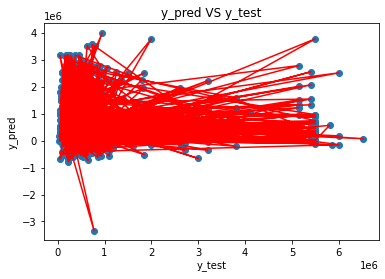

In [221]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred,color='red')
plt.title('y_pred VS y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The prediction results are a little better than before


Using Decision Tree Regression

In [222]:
from sklearn.tree import DecisionTreeRegressor

In [223]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']



In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [225]:
dtreg=DecisionTreeRegressor()
dtreg.fit(x,y)

DecisionTreeRegressor()

In [226]:
dtreg.score(x_train,y_train)

0.9995659012761974

In [227]:
y_pred=dtreg.predict(x_test)
y_pred[0:5]

array([501000.        , 486666.66666667, 140000.        , 476999.        ,
       620000.        ])

In [228]:
y_test

3756    501000
5692    440000
3637    140000
7693    476999
3565    620000
         ...  
656     650000
741     450000
298     500000
784     220000
5269    150000
Name: selling_price, Length: 3163, dtype: int64

Using Decision tree Regression gave better results.


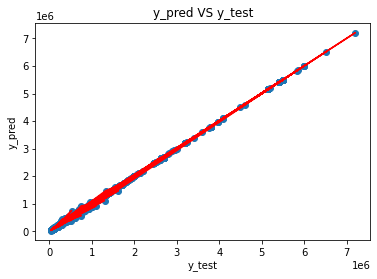

In [229]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred,color='red')
plt.title('y_pred VS y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()